# Регрессия: дерево решений

In [6]:
from matplotlib import pyplot as plt
import graphviz
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

## Загрузка набора данных "Boston"
Описание - в файле boston.txt
Особенности загрузки и выделения значений признаков (независимых переменных) и целевой переменной связаны со структурой исходнjго набора "сырых" (raw) данных.

In [1]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"

raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

X = data
y = target

### Особенности данных
Можно посмотреть посмотреть файл по ссылке - видно, что фактически одному объекту соответствует две строки, но во второй всего 3 значения:

In [2]:
raw_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8


Соответственно, надо соединить пары строк:
Команда np.hstack используется для горизонтального соединения двух массивов.

Здесь соединяются массивы:

Массив raw_df.values[::2, :] включает каждую четную строку (0,2, 4...) из
исходного массива raw_df.values.

Массив raw_df.values[1::2, :2] берет 2 столбца из каждой нечетной строки (1, 3,...).

Последнее значение в нечетных строках - целевая переменная.

Результат подготовки данных для обучения:

In [3]:
data[:5, :]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

In [4]:
target[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

## Обучение модели
Установим ограничение на глубину дерева:

In [7]:
regr = DecisionTreeRegressor(max_depth=3, random_state=1234)
model = regr.fit(X, y)

### Вывод модели в текстовом виде
Результаты обучения - прогнозное значение в узлах дерева.

Используется модуль tree:

In [8]:
text_representation = tree.export_text(regr)
print(text_representation)

|--- feature_5 <= 6.94
|   |--- feature_12 <= 14.40
|   |   |--- feature_7 <= 1.38
|   |   |   |--- value: [45.58]
|   |   |--- feature_7 >  1.38
|   |   |   |--- value: [22.91]
|   |--- feature_12 >  14.40
|   |   |--- feature_0 <= 6.99
|   |   |   |--- value: [17.14]
|   |   |--- feature_0 >  6.99
|   |   |   |--- value: [11.98]
|--- feature_5 >  6.94
|   |--- feature_5 <= 7.44
|   |   |--- feature_4 <= 0.66
|   |   |   |--- value: [33.35]
|   |   |--- feature_4 >  0.66
|   |   |   |--- value: [14.40]
|   |--- feature_5 >  7.44
|   |   |--- feature_10 <= 19.65
|   |   |   |--- value: [45.90]
|   |   |--- feature_10 >  19.65
|   |   |   |--- value: [21.90]



### Вывод модели в виде дерева
Используются имена признаков из описания набора данных:

In [9]:
boston_feature_names =['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT']

В узлах отображаются прогнозное значение, число элементов выборки, ошибка.

Для визуализации используется модуль tree:

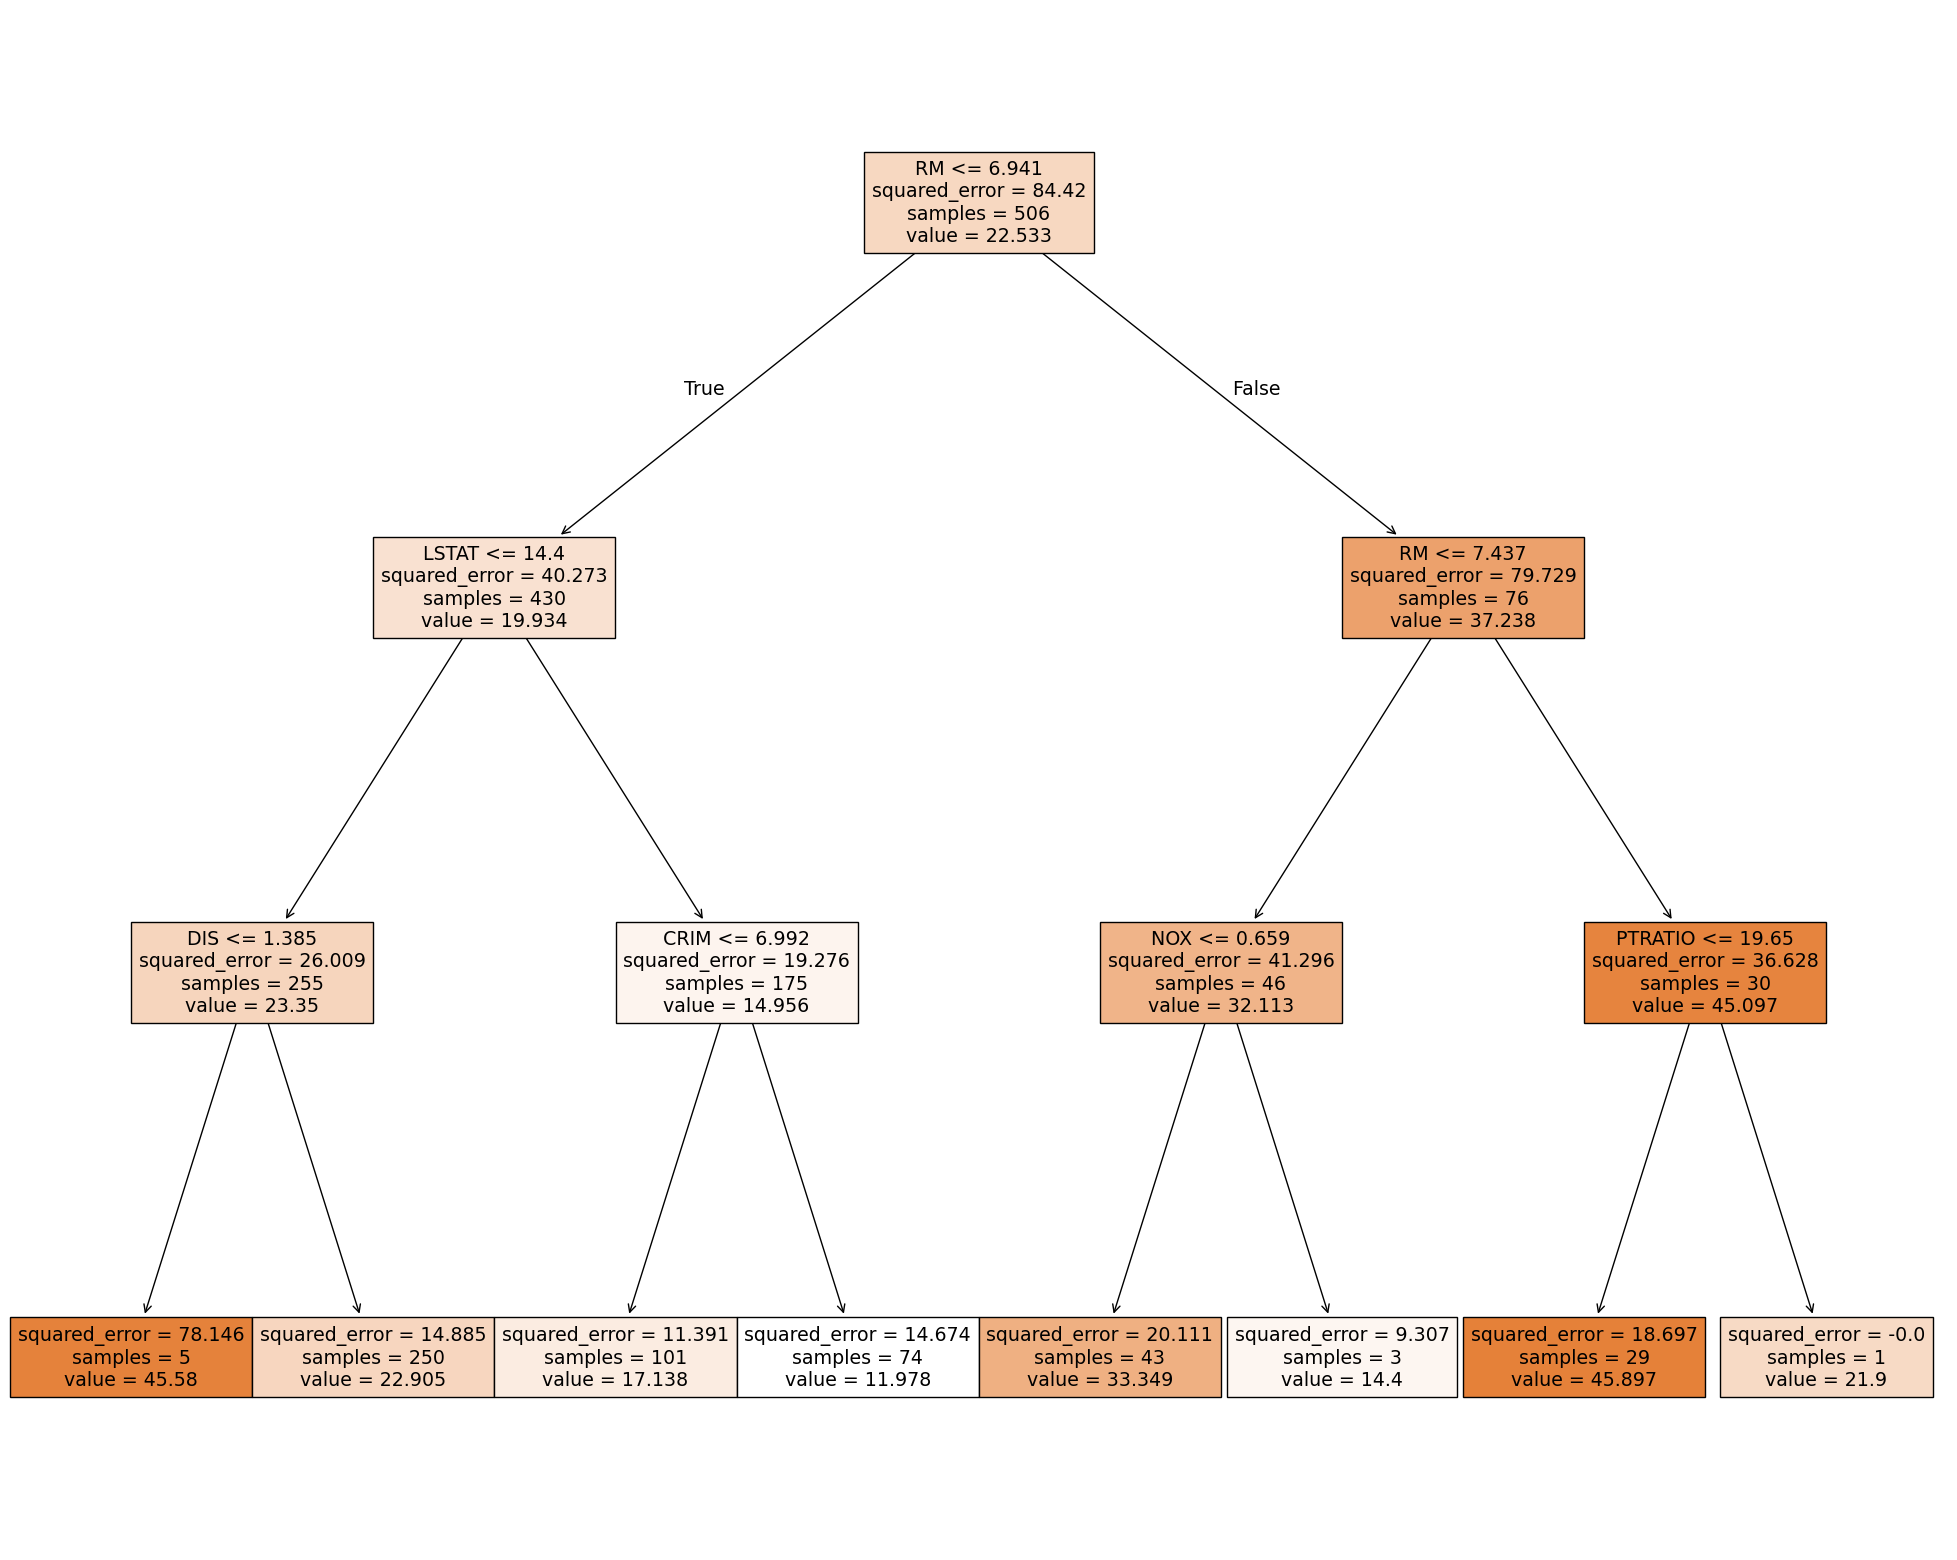

In [10]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr, feature_names=boston_feature_names, filled=True)

### Использование библиотеки graphviz

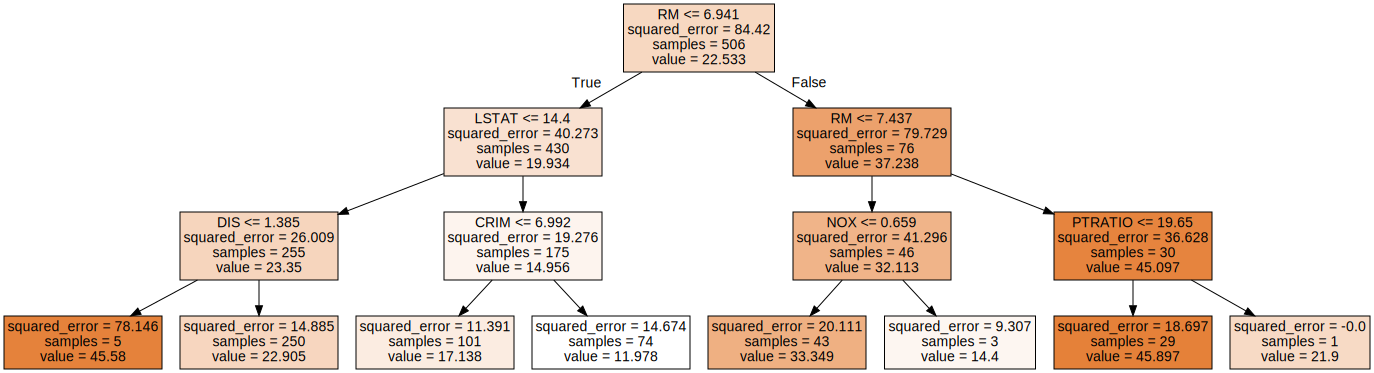

In [11]:
dot_data = tree.export_graphviz(regr, out_file=None,
                                feature_names=boston_feature_names,
                                filled=True)
graphviz.Source(dot_data, format="png")

## Визуализация с использованием dtreeviz
Установка (непосредственно недоступна):

In [12]:
!pip install dtreeviz


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 4.3 MB/s eta 0:00:00


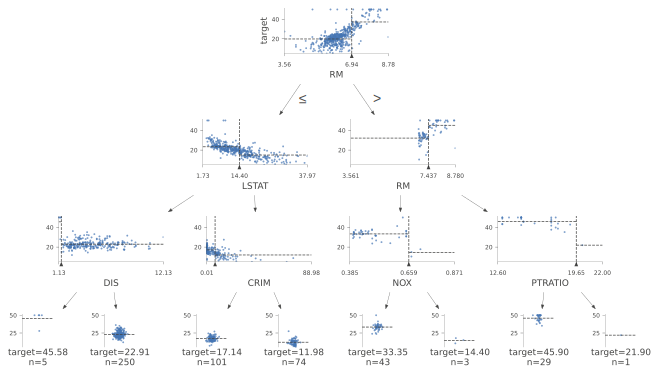

In [13]:
import dtreeviz # обычный импорт
# вызов функции
viz = dtreeviz.model(regr, X, y,
                target_name="target",
                feature_names=boston_feature_names)
viz.view()